## Source data

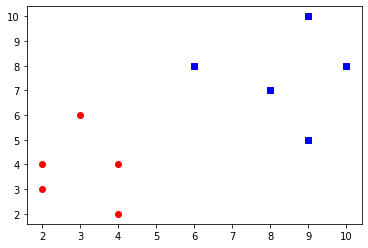

In [144]:
import numpy as np
import matplotlib.pyplot as plt
X_1 = np.array([[4,2],[2,4],[2,3],[3,6],[4,4]])
X_2 = np.array([[9,10],[6,8],[9,5],[8,7],[10,8]])

plt.scatter(X_1[:,0],X_1[:,1],marker='o',color='red')
plt.scatter(X_2[:,0],X_2[:,1],marker='s',color='blue')
plt.show()


### calculate vector mean

In [145]:
X_1_mean = np.mean(X_1, axis=0)
print(X_1_mean)
X_2_mean = np.mean(X_2,axis=0)
print(X_2_mean)

[3.  3.8]
[8.4 7.6]


#### scatter matrices and within-class scatter matrix calculation

In [146]:
#covariance matrix for each class
X_1_shift = X_1 - X_1_mean
X_1_cov = np.cov(X_1_shift.T)
print(X_1_shift)
print(X_1_cov)

[[ 1.  -1.8]
 [-1.   0.2]
 [-1.  -0.8]
 [ 0.   2.2]
 [ 1.   0.2]]
[[ 1.   -0.25]
 [-0.25  2.2 ]]


In [147]:
#covariance matrix for each class
X_2_shift = X_2 - X_2_mean
X_2_cov = np.cov(X_2_shift.T)
print(X_2_shift)
print(X_2_cov)

[[ 0.6  2.4]
 [-2.4  0.4]
 [ 0.6 -2.6]
 [-0.4 -0.6]
 [ 1.6  0.4]]
[[ 2.3  -0.05]
 [-0.05  3.3 ]]


In [148]:
# S_W = (5-1) * (X_1_cov + X_2_cov)
S_W = X_1_cov + X_2_cov
print(S_W)

[[ 3.3 -0.3]
 [-0.3  5.5]]


In [149]:
#### Between-class scatter matrix calculation
X_mean = X_1_mean - X_2_mean
print(X_mean)
X_T = X_mean.reshape(-1,1)
print(X_T)
X_mean = X_mean.reshape(1,-1)
print(X_mean)
S_B = np.dot(X_T,X_mean)
print(S_B)

[-5.4 -3.8]
[[-5.4]
 [-3.8]]
[[-5.4 -3.8]]
[[29.16 20.52]
 [20.52 14.44]]


#### Solve generalized eigenvalue problem for the matrix to obtain the linear discriminants

In [150]:
eig_vals, eig_vecs_1 = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
print(eig_vals)
print(eig_vecs_1)

[12.20066445  0.        ]
[[ 0.90878558 -0.57549341]
 [ 0.41726342  0.81780642]]


In [151]:
print(S_W)
print(X_T)
S_inv = np.linalg.inv(S_W)
print(S_inv)
eig_vecs_2 = S_inv.dot(X_T)
print(eig_vecs_2)
norm = np.linalg.norm(eig_vecs_2)
eig_vec_2 = eig_vecs_2/norm
print(eig_vec_2)

[[ 3.3 -0.3]
 [-0.3  5.5]]
[[-5.4]
 [-3.8]]
[[0.30454042 0.0166113 ]
 [0.0166113  0.18272425]]
[[-1.7076412 ]
 [-0.78405316]]
[[-0.90878558]
 [-0.41726342]]


0.9087855843337986 0.41726342004431227


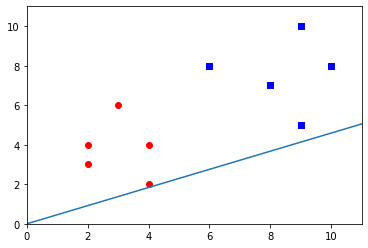

In [152]:
plt.scatter(X_1[:,0],X_1[:,1],marker='o',color='red')
plt.scatter(X_2[:,0],X_2[:,1],marker='s',color='blue')

print(eig_vecs_1[0][0],eig_vecs_1[1][0])
plt.xlim(0,11),plt.ylim(0,11)
plt.axline((0,0),(eig_vecs_1[0][0],eig_vecs_1[1][0]))
plt.show()

#### check result of PCA

In [154]:
from sklearn.decomposition import PCA
datasets = X_1 + X_2
pca = PCA(2) #chosen number of dimensions
pca.fit(datasets)
print(pca.components_)
print(pca.explained_variance_)
B = pca.transform(datasets)
print(B)   

[[-0.98195639 -0.18910752]
 [ 0.18910752 -0.98195639]]
[5.35777472 3.74222528]
[[-1.68459473 -0.2866018 ]
 [ 3.2251872  -1.2321394 ]
 [ 1.03574813  3.26300871]
 [ 0.09021052 -1.64677323]
 [-2.66655112 -0.09749428]]


-0.9819563867314219 0.18910752115495139


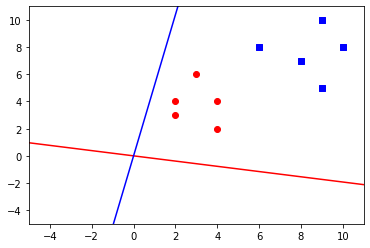

In [160]:
plt.scatter(X_1[:,0],X_1[:,1],marker='o',color='red')
plt.scatter(X_2[:,0],X_2[:,1],marker='s',color='blue')

print(pca.components_[0][0],pca.components_[1][0])
plt.xlim(-5,11),plt.ylim(-5,11)
plt.axline((0,0),(pca.components_[0][0],pca.components_[1][0]),color='red')
plt.axline((0,0),(pca.components_[0][1],pca.components_[1][1]),color='blue')
plt.show()